# Anomaly Detection

In [1]:
import numpy as np
from sklearn.ensemble import IsolationForest 
from sklearn import datasets
from sklearn.datasets import make_blobs
from sklearn import preprocessing
import matplotlib.pyplot as plt
from numpy import quantile, where, random 
import statistics as stat
import random as rd

## The data
### Data set 1

In [2]:
n=400
X0,y0=datasets.make_moons(n_samples=n,noise=0.05)
X0 = preprocessing.scale(X0)

# add 10% of uniform distributed observations to the previous data to build the data set 1
X1 = np.concatenate((np.random.uniform(low=-3,high=3,size=(int(0.1*n), 2)),X0))

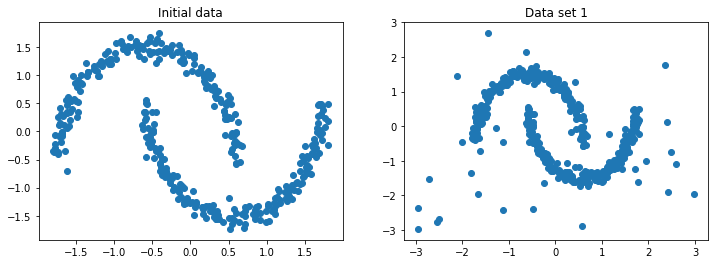

In [3]:
# visulization 
figure = plt.figure(figsize=(12,4))
ax = plt.subplot(1,2,1); plt.scatter(X0[:,0],X0[:,1])
ax.set_title('Initial data')

ax = plt.subplot(1,2,2); plt.scatter(X1[:,0],X1[:,1])
ax.set_title('Data set 1')

plt.show()

## Data set 2

In [4]:
# number of samples
NG1=200 
# parameters of distribution
mx1G1=0; mx2G1=0; sx1G1=1; sx2G1=1; rhoxG1=0.95
mu1 = [mx1G1, mx2G1]; covxG1=[[sx1G1**2, rhoxG1*sx1G1*sx2G1], [rhoxG1*sx1G1*sx2G1, sx1G1**2]]

XG1 = np.random.multivariate_normal(mu1,covxG1,NG1)
X0 = preprocessing.scale(XG1)

# add 10% of uniform distributed observations to the previous data to build the data set 2
X2 = np.concatenate((np.random.uniform(low=-3,high=3,size=(int(0.1*n), 2)),X0))

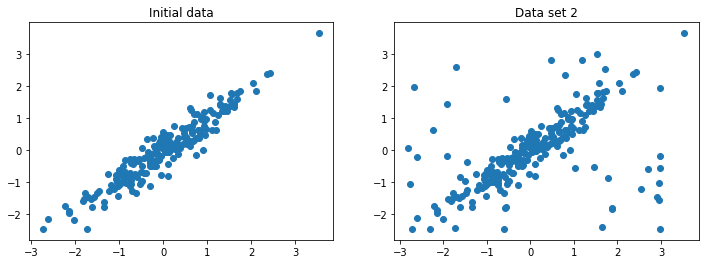

In [5]:
# visulization 
figure = plt.figure(figsize=(12,4))
ax = plt.subplot(1,2,1); plt.scatter(X0[:,0],X0[:,1])
ax.set_title('Initial data')

ax = plt.subplot(1,2,2); plt.scatter(X2[:,0],X2[:,1])
ax.set_title('Data set 2')

plt.show()

## Isolation forest

In [6]:
#Anomaly detection for X1 with score
iforest1 = IsolationForest(n_estimators=100); tmp1=iforest1.fit(X1)
scores1 = iforest1.score_samples(X1) # Attention: the score_samples gives the opposite of the anomaly score defined in the original paper, where higher value has higher possibility of being isolated points

abnm1 = np.where(scores1< np.quantile(scores1,0.05))

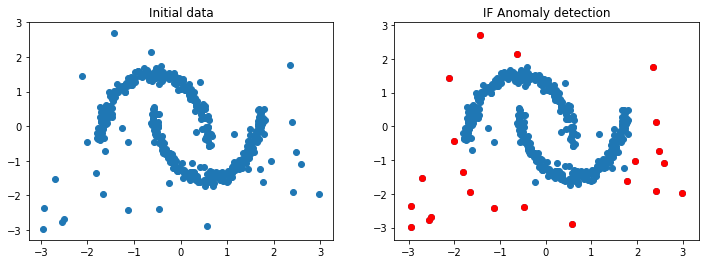

In [7]:
figure = plt.figure(figsize=(12,4))
ax = plt.subplot(1,2,1); plt.scatter(X1[:,0],X1[:,1])
ax.set_title('Initial data')

ax = plt.subplot(1,2,2); plt.scatter(X1[:,0],X1[:,1]); plt.scatter(X1[abnm1,0],X1[abnm1,1],c="r")
ax.set_title('IF Anomaly detection')

plt.show()

In [8]:
#Anomaly detection for X2 with score
iforest2 = IsolationForest(n_estimators=100); tmp2=iforest2.fit(X2)
scores2 = iforest2.score_samples(X2)

abnm2 = np.where(scores2< np.quantile(scores2,0.05))

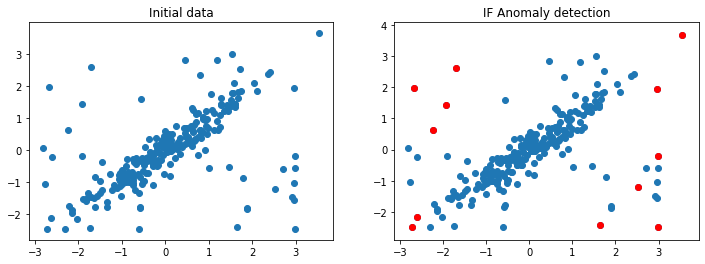

In [9]:
figure = plt.figure(figsize=(12,4))
ax = plt.subplot(1,2,1); plt.scatter(X2[:,0],X2[:,1])
ax.set_title('Initial data')

ax = plt.subplot(1,2,2); plt.scatter(X2[:,0],X2[:,1]); plt.scatter(X2[abnm2,0],X2[abnm2,1],c="r")
ax.set_title('IF Anomaly detection')

plt.show()

## Local Outlier factor

In [10]:
from sklearn.neighbors import LocalOutlierFactor

lof1 = LocalOutlierFactor(n_neighbors=20, contamination=.01) 
y1_pred = np.where(lof1.fit_predict(X1)==-1)

lof15 = LocalOutlierFactor(n_neighbors=20, contamination=.05) 
y15_pred = np.where(lof15.fit_predict(X1)==-1)

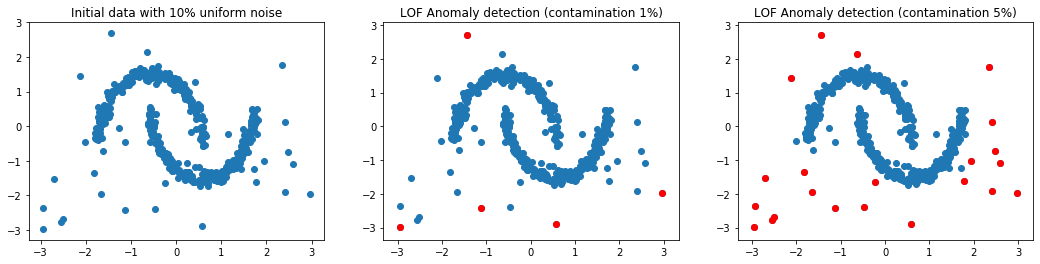

In [11]:
figure = plt.figure(figsize=(18,4))
ax = plt.subplot(1,3,1); plt.scatter(X1[:,0],X1[:,1])
ax.set_title('Initial data with 10% uniform noise')

ax = plt.subplot(1,3,2); plt.scatter(X1[:,0],X1[:,1]); plt.scatter(X1[y1_pred,0],X1[y1_pred,1],c="r")
ax.set_title('LOF Anomaly detection (contamination 1%)')

ax = plt.subplot(1,3,3); plt.scatter(X1[:,0],X1[:,1]); plt.scatter(X1[y15_pred,0],X1[y15_pred,1],c="r")
ax.set_title('LOF Anomaly detection (contamination 5%)')

plt.show()

In [12]:
lof2 = LocalOutlierFactor(n_neighbors=20, contamination=.01) 
y2_pred = np.where(lof2.fit_predict(X2)==-1)

lof25 = LocalOutlierFactor(n_neighbors=20, contamination=.05) 
y25_pred = np.where(lof25.fit_predict(X2)==-1)

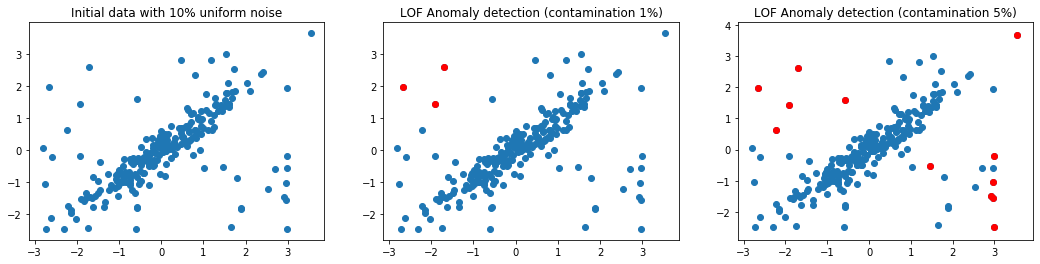

In [13]:
figure = plt.figure(figsize=(18,4))
ax = plt.subplot(1,3,1); plt.scatter(X2[:,0],X2[:,1])
ax.set_title('Initial data with 10% uniform noise')

ax = plt.subplot(1,3,2); plt.scatter(X2[:,0],X2[:,1]); plt.scatter(X2[y2_pred,0],X2[y2_pred,1],c="r")
ax.set_title('LOF Anomaly detection (contamination 1%)')

ax = plt.subplot(1,3,3); plt.scatter(X2[:,0],X2[:,1]); plt.scatter(X2[y25_pred,0],X2[y25_pred,1],c="r")
ax.set_title('LOF Anomaly detection (contamination 5%)')

plt.show()

## Density based Anomaly detection

Assuming that the inlier data are Gaussian distributed, it will estimate the inlier location and covariance in a robust way (i.e. without being influenced by outliers).

`EllipticEnvelope()` is an object for detecting outliers in a Gaussian distributed dataset.

-----------
important parameters:
- contamination : float in (0., 0.5). The amount of contamination of the data set, i.e. the proportion of outliers in the data set.


In [14]:
from sklearn.covariance import EllipticEnvelope 

mod1=EllipticEnvelope(contamination=0.05); y1_pred = np.where(mod1.fit_predict(X1)==-1)
mod2=EllipticEnvelope(contamination=0.05); y2_pred = np.where(mod2.fit_predict(X2)==-1)

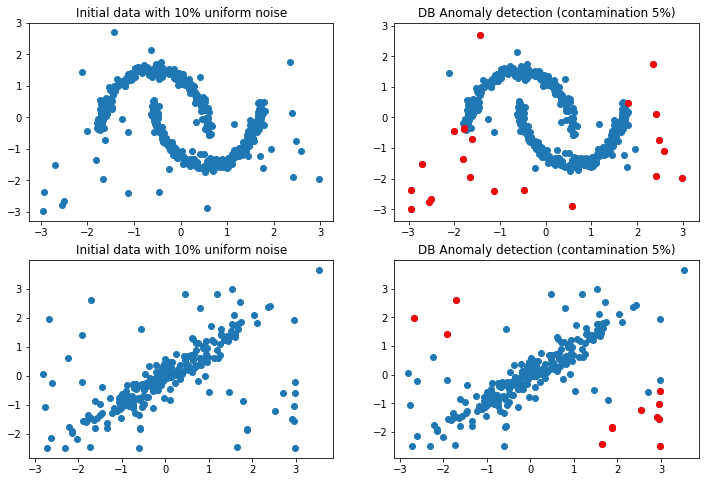

In [15]:
figure = plt.figure(figsize=(12,8))
ax = plt.subplot(2,2,1); plt.scatter(X1[:,0],X1[:,1])
ax.set_title('Initial data with 10% uniform noise')

ax = plt.subplot(2,2,2); plt.scatter(X1[:,0],X1[:,1]); plt.scatter(X1[y1_pred,0],X1[y1_pred,1],c="r")
ax.set_title('DB Anomaly detection (contamination 5%)')

ax = plt.subplot(2,2,3); plt.scatter(X2[:,0],X2[:,1])
ax.set_title('Initial data with 10% uniform noise')

ax = plt.subplot(2,2,4); plt.scatter(X2[:,0],X2[:,1]); plt.scatter(X2[y2_pred,0],X2[y2_pred,1],c="r")
ax.set_title('DB Anomaly detection (contamination 5%)')

plt.show()
